In [2]:
# Import Libraries and Load dataset

import pandas as pd
import numpy as np


df=pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

We have Extracurricular Activities as categorical data, need to transform into numerical data


In [5]:
# Transforming categorical into numerical

df['Extracurricular Activities']=df['Extracurricular Activities'].astype('category')
df['Extracurricular Activities']=df['Extracurricular Activities'].cat.codes

In [6]:
df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]

In [7]:
df.shape

(10000, 6)

In [8]:
df.describe

<bound method NDFrame.describe of       Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0           

In [11]:
# Checking null values

df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [13]:
# Checking duplicate values

df.duplicated().any()

np.True_

In [14]:
# Drop duplicates

df.drop_duplicates(keep='first', inplace=True)

In [16]:
df.shape

(9873, 6)

Duplicated 127 elements have been removed

In [17]:
df.describe()

Hours Studied  Previous Scores  Extracurricular Activities  \
count    9873.000000      9873.000000                 9873.000000   
mean        4.992100        69.441102                    0.494986   
std         2.589081        17.325601                    0.500000   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  9873.000000                       9873.000000        9873.000000  
mean      6.531652                          4.583004          55.216651  
std       1.697683                          2.867202          19.208570  
min       4.000000                          0.000000          10.000000  
25%       5.000000                          2.000000          40.000000  
50%       7.000000                          5.000000          55.000000  
75%       8.000000                          7.000000          70.000000  
max       9.000000                          9.000000         100.000000

Here we have many features to consider, so we will look forward to get the correlation details of each feature

<Axes: >

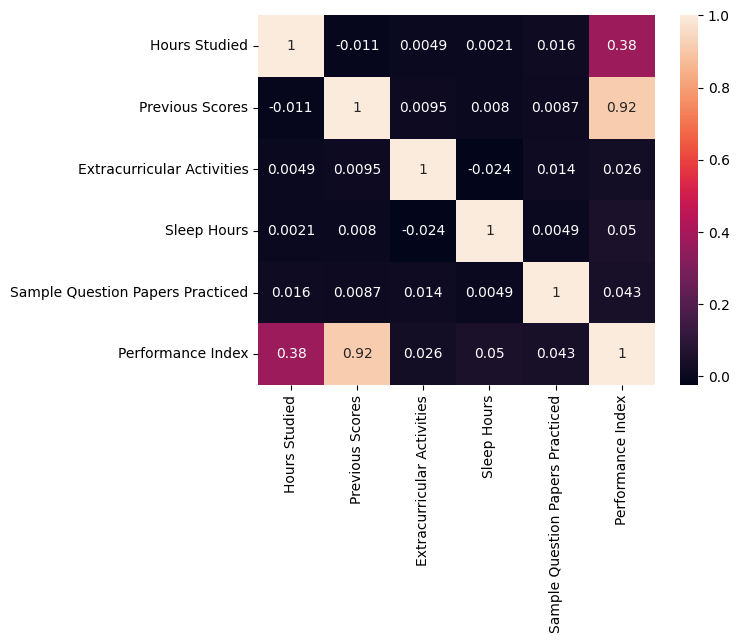

In [20]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In the above plot it's been observed that Previous scores and Hours studies has good positive correlation. We will be considering these features.

In [23]:
y=df['Performance Index']

In [29]:
X = df.drop(['Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'], axis=1)

In [30]:
X

Hours Studied  Previous Scores
0                 7               99
1                 4               82
2                 8               51
3                 5               52
4                 7               75
...             ...              ...
9995              1               49
9996              7               64
9997              6               83
9998              9               97
9999              7               74

[9873 rows x 2 columns]

In [31]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [42]:
# Split the data into training and testing data

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
# Test the training data set

y_pred = lr.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, root_mean_squared_error

print(r2_score(y_test, y_pred))

0.9850233951895029
